In [2]:
import pandas as pd
import numpy as np

# Wine Reviews

## Preprocessing

In [21]:
df = pd.read_csv('corpora/wine/winemag-data_first150k.csv',index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


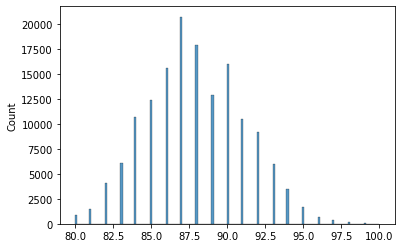

80 100


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['points'].values)
plt.show()

print(np.min(df['points'].values),np.max(df['points'].values))

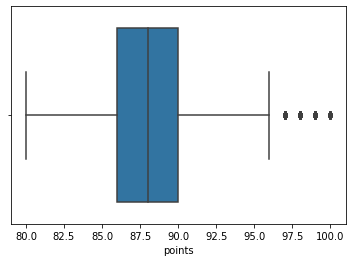

In [11]:
sns.boxplot(x=df["points"])
plt.show()

In [22]:
points = np.quantile(df['points'],q=[1/3,2/3])

def assign_label(x):
    tupla = np.where(x-points<0)[0]
    if tupla.shape[0]>0:
        return tupla[0]
    else:
        return points.shape[0] 

df['Sentiment'] = df['points'].apply(assign_label)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Sentiment
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,2
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,2
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,2
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,2
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,2
...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,2
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,2


In [23]:
labels = np.unique(df['Sentiment'].values)
print(labels)

[0 1 2]


In [ ]:
list(df[df['Sentiment']==2]['description'].values)

In [26]:
df.to_pickle('corpora/wine.pickle')

In [28]:
from TextCleaner import clean

df['tokens'] = df['description'].apply(clean)
df.sample(5)


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Sentiment,tokens
26218,Spain,A strange bird with herbaceous aromas that sug...,Crianza,82,16.0,Levante,Jumilla,NaN,Red Blend,Casa de la Ermita,0,"[strange, bird, herbaceous, aroma, suggest, sa..."
72694,US,It's interesting and a little odd that this 10...,To Kalon Vineyard I Block,91,75.0,California,Oakville,Napa,Fumé Blanc,Robert Mondavi,2,"[interesting, little, odd, sauvignon, blanc, m..."
40572,US,Quite full bodied and obviously powerful in fl...,Big River Ranch,93,40.0,California,Alexander Valley,Sonoma,Zinfandel,Bella,2,"[quite, full, bodied, obviously, powerful, fla..."
45307,US,This extraordinarily rich Syrah swamps the mou...,Garys' Vineyard,89,33.0,California,Santa Lucia Highlands,Central Coast,Syrah,Novy,2,"[extraordinarily, rich, syrah, swamp, mouth, j..."
48081,Chile,"Toasty and sweet on the nose, with burnt brown...",Family Selection Gran Reserva,88,15.0,Colchagua Valley,NaN,NaN,Shiraz,Luis Felipe Edwards,1,"[toasty, sweet, nose, burnt, brown, sugar, lea..."


In [29]:
df.to_pickle('corpora/wine.pickle')

In [31]:
from gensim.models import Word2Vec

tokens_list = df['tokens'].values

dim = 100
W2V = Word2Vec(tokens_list, min_count=3, vector_size=dim, workers=4, window=5)
fname = f"models/wine_w2v_{dim}.model"
W2V.save(fname)

## Gridsearch

In [3]:
from experiment_tools_SA import MyGridSearch
from gensim.models import Word2Vec
import pandas as pd

# betas1 = [0.5,1,2]#np.linspace(0.1,2,5)
# betas2 = [0.5,1,2]#np.linspace(0.5,5,5)
nums_cols = [3,5,7]
# alphas = [0.5,0.75,0.9]#np.linspace(0.25,0.98,5)

params_dict = {
                # 'beta1':betas1,
                # 'beta2':betas2,
                'n_cols':nums_cols
                # 'alpha':alphas
                }


df = pd.read_pickle('corpora/wine.pickle')
df.rename(columns={'description':'text'},inplace=True)
w2v_model = Word2Vec.load("models/wine_w2v_100.model")

hyperparams_dict = {'emb_model': w2v_model,
                    'df': df,
                    'n_clases': 3}

gs = MyGridSearch(param_dict=params_dict,hyper_params_dict=hyperparams_dict)


Number of combinations to try 3


In [ ]:
# nlp.max_length = 1030000

best_params = gs.fit()

In [41]:
gs.best_params_dict

{'n_cols': 7, 'top_n': 100, 'alpha': 0.9, 'beta1': 1, 'beta2': 1}

In [ ]:
from SentimentKW import KW

df = pd.read_pickle('corpora/wine.pickle')
df['Normalized Label'] = (1/2)*df['Sentiment'].values-1

ake = KW(df=df,text_col_name="clean text",label_col_name="Normalized Label")

kw_dict = ake.get_kw(topn=50)

In [3]:
import pandas as pd
import numpy as np
import pickle
from gensim.models import Word2Vec

df = pd.read_pickle('corpora/movie-reviews/train-reduced.pickle')
df.rename(columns={'clean text':'text'},inplace=True)
y = df['Sentiment'].values

w2v_model = Word2Vec.load("models/movies_w2v_100.model")

# with open('data/auto_kw_wine.pickle', 'rb') as handle:
#     kw_dict = pickle.load(handle)

iterate = Iterador(kw_dict=kw_dict,
                    emb_model=w2v_model,
                    df = df,
                    n_clases=5)

In [4]:
n_iter = 5

losses, accs = iterate.iterar(alpha=0.95,
                                beta1=1,
                                beta2=1,
                                n_cols=9,
                                n_iter=n_iter)

2022-09-28 11:04:08.508459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


67/67 [==============================] - 0s 4ms/step - loss: 1.3562 - accuracy: 0.3933
1/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3743 - accuracy: 0.3722
2/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3020 - accuracy: 0.4051
3/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3536 - accuracy: 0.3797
4/5 done...
67/67 [==============================] - 0s 4ms/step - loss: 1.3023 - accuracy: 0.4065
5/5 done...


In [5]:
print(f"Best accuracy: {np.max(accs)}")
print(f"Best loss: {np.min(losses)}")

Best accuracy: 0.40646976232528687
Best loss: 1.3020257949829102


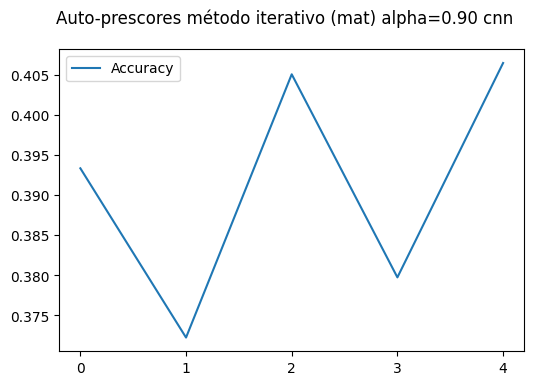

In [6]:
import matplotlib.pyplot as plt

title = "Auto-prescores método iterativo (mat) alpha=0.90 cnn"

plt.figure(dpi=100)
plt.suptitle(title)
plt.plot(range(n_iter),accs,label='Accuracy')
plt.xticks([k for k in range(n_iter)])
plt.legend(loc='best')
plt.savefig(title+".png")
plt.show()


## Test run

In [1]:
import pandas as pd

df = pd.read_pickle('corpora/wine.pickle')
df.sample(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Sentiment,tokens,clean text
38893,US,"Ripe orange, lime and honey flavors combine wi...",NaN,87,20.0,California,Sonoma Valley,Sonoma,Chardonnay,Wellington,1,"[ripe, orange, lime, honey, flavor, combine, t...",ripe orange lime honey flavor combine tingly m...
136189,Italy,This bottle has much of the history of Italian...,NaN,84,10.0,Tuscany,Chianti,NaN,Sangiovese,Ruffino,0,"[bottle, much, history, italian, winemaking, i...",bottle much history italian winemaking inside ...
15795,US,Dense and meaty like a baked purple leather po...,Ghielmetti Vineyard,89,50.0,California,Livermore Valley,Central Coast,Petit Verdot,Steven Kent,2,"[dense, meaty, like, baked, purple, leather, p...",dense meaty like baked purple leather pouch ti...


In [ ]:
from experiment_tools_SA import SentimentAnalysis
from gensim.models import Word2Vec


# betas1 = [0.5,1,2]#np.linspace(0.1,2,5)
# betas2 = [0.5,1,2]#np.linspace(0.5,5,5)
# nums_cols = [3,5,7]
# alphas = [0.5,0.75,0.9]#np.linspace(0.25,0.98,5)

# params_dict = {
#                 # 'beta1':betas1,
#                 # 'beta2':betas2,
#                 'n_cols':nums_cols
#                 # 'alpha':alphas
#                 }



w2v_model = Word2Vec.load("models/wine_w2v_100.model")

hpd = {'emb_model': w2v_model}

sa = SentimentAnalysis(hyper_params_dict=hpd,
                        df=df,
                        text_col_name='clean text',
                        label_col_name='Sentiment',
                        )

In [ ]:
comb_dict = {
            'beta1': 1,
            'beta2': 1,
            'n_cols': 5,
            'alpha': 0.9,
            'top_n': 50
            }

results = sa.run(combination_dict=comb_dict)